<a href="https://colab.research.google.com/github/DorotaJanosz/machine-learning-bootcamp/blob/master/supervised/03_classification/01_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, formatter=dict(float=lambda x: f'{x:.2f}'))

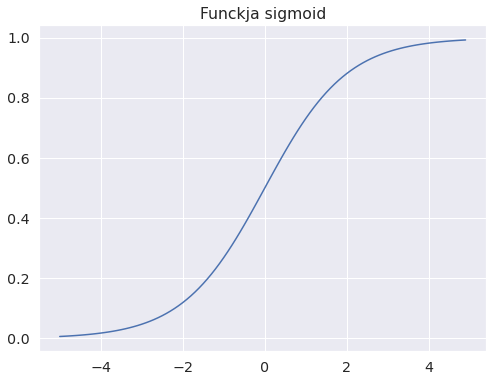

In [32]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.arange(-5, 5, 0.1)
Y = sigmoid(X)

plt.figure(figsize=(8,6))
plt.title('Funckja sigmoid')
plt.plot(X, Y)
plt.show()

###Załadowanie danych

In [33]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [34]:
print(raw_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [35]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'Rozmiar data: {data.shape}')
print(f'Rozmiar target: {target.shape}')

Rozmiar data: (569, 30)
Rozmiar target: (569,)


###Podział danych na zbió treningowy i testowy

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'Rozmiar X_train: {X_train.shape}')
print(f'Rozmiar y_train: {y_train.shape}')
print(f'Rozmiar X_test: {X_test.shape}')
print(f'Rozmiar y_test: {y_test.shape}')

Rozmiar X_train: (426, 30)
Rozmiar y_train: (426,)
Rozmiar X_test: (143, 30)
Rozmiar y_test: (143,)


###Przygotowanie danych do modelu

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-1.66, -0.58, -1.63, -1.27, -0.76, -0.87, -0.92, -1.11, -0.16, 0.32, ..., -1.51, -0.62, -1.49, -1.13, -0.15, -0.79, -0.99, -1.37, 0.35, -0.61],
       [0.04, 0.59, 0.07, -0.06, 0.12, 0.10, 0.55, 0.18, 0.27, -0.23, ..., -0.07, 0.79, 0.27, -0.14, 0.51, 1.14, 1.22, 0.48, 1.18, 1.09],
       [-1.14, 0.48, -1.17, -0.97, -1.10, -1.25, -1.09, -1.13, -0.68, 0.23, ..., -1.07, 0.55, -1.11, -0.89, -0.91, -1.23, -1.26, -1.37, -0.93, -0.20],
       [0.57, -0.33, 0.62, 0.43, 0.53, 0.98, 0.60, 0.74, 0.69, 0.34, ..., 0.83, 0.27, 0.77, 0.69, 0.51, 2.19, 1.26, 1.13, 2.34, 2.45],
       [1.53, 3.16, 1.47, 1.60, -0.89, 0.16, 0.33, 0.45, -1.44, -1.43, ..., 2.44, 3.31, 2.19, 2.86, 0.34, 1.05, 0.64, 0.76, -0.31, -0.51],
       [-0.57, -1.40, -0.57, -0.59, 0.95, -0.28, -0.64, -0.54, -0.58, 0.48, ..., -0.58, -1.66, -0.60, -0.58, 0.84, -0.61, -0.53, -0.62, -0.20, -0.21],
       [-0.74, -0.27, -0.74, -0.70, -0.58, -0.53, -0.69, -0.87, -1.50, -0.06, ..., -0.74, -0.68, -0.73, -0.69, -0.83, -0.50, -0.72, -0

###Dopasowanie modelu

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg =  LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###Predykcja na podstawie modelu

In [39]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [40]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.30, 0.70],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.10, 0.90],
       [0.00, 1.00],
       [0.97, 0.03],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.37, 0.63],
       [0.07, 0.93],
       [0.92, 0.08],
       [1.00, 0.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.99, 0.01],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.01, 0.99],
       [0.24, 0.76],
       [0.01, 0.99],
       [1.00, 0.00],
       [0.68, 0.32]])

###Ocena modelu

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f857b1c3f98>)

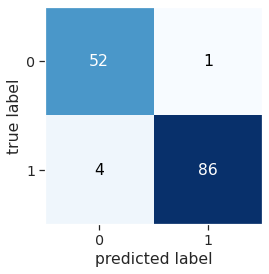

In [43]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [44]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.965034965034965


In [45]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95        53
           1       0.99      0.96      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

